In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from itertools import islice
from more_itertools import unique_everseen
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import warnings
warnings.simplefilter("ignore")
nltk.download(['stopwords', 'punkt', 'wordnet', 'onw-1.4', 'vader_lexicon'])
%matplotlib inline

[nltk_data] Package 'onw-1.4' not found in index


In [2]:
#loading the dataset
text = pd.read_csv("tourist_accommodation_reviews.csv")

In [3]:
#checking the different variables
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [4]:
#view the first 5 rows of the dataset
text.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [5]:
#checking the size of the dataset
text.shape

(53644, 5)

In [6]:
#checking for null values
text.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [7]:
#checking the number of reviews per location
text['Location'].value_counts()

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64

In [8]:
#checking how many hotels per location
location_size = text.groupby(["Location"])['Hotel/Restaurant name'].nunique()
location_size

Location
 Bang Tao Beach        6
 Cape Panwa           15
 Chalong              13
 Choeng Thale         34
 Kamala               32
 Karon                59
 Karon Beach           4
 Kata Beach           59
 Kata Noi Beach        2
 Kathu                11
 Koh Kaew              3
 Mai Khao             24
 Nai Harn              9
 Nai Thon              1
 Nai Yang             10
 Pa Khlok              1
 Patong              164
 Phuket Town          34
 Ratsada               1
 Rawai                39
 Sakhu                 1
 Talat Nuea            1
 Talat Yai             3
 Thalang District     12
 Wichit                4
Name: Hotel/Restaurant name, dtype: int64

In [9]:
#selecting one location with over 30 hotels
location_kamala = text.query('Location == " Kamala"')
location_kamala

,ID,Review Date,Location,Hotel/Restaurant name,Review
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but..."
...,...,...,...,...,...
52475,rn337159219,"Reviewed January 4, 2016",Kamala,Karon Seafood,This is a busy restaurant but the service is v...
52476,rn335662582,"Reviewed December 29, 2015",Kamala,Karon Seafood,It was our first night in Karon and we didn't ...
52477,rn334004242,"Reviewed December 20, 2015",Kamala,Karon Seafood,We unfortunately didn't read trip-advisor befo...
52478,rn329307909,"Reviewed November 26, 2015",Kamala,Karon Seafood,"Ordered springrolls, phad tai and red curry.\r..."


In [10]:
#reconfirming the number of hotels in the location
location_kamala['Hotel/Restaurant name'].nunique()

32

In [11]:
#checking number of reviews for each hotel
location_kamala['Hotel/Restaurant name'].value_counts()

Grill Bill                                                       100
White Orchid                                                     100
Wine Connection Deli & Bistro - Central Phuket                   100
Top Of The Reef at Cape Panwa Hotel                              100
H.C. Andersen - Family Restaurant                                100
Cafe del Mar Phuket                                              100
Kaab Gluay                                                       100
Mamma Mia Grill & Restaurant Kamala                              100
Ohlala                                                           100
Sweet Dream Restaurant                                           100
THE DECK                                                         100
The Greek Tavern                                                 100
HQ Beach Lounge                                                  100
Smile Bar                                                        100
Karon Seafood                     

In [12]:
#using list and isslice to get 30 unique hotels.
unique_30 = list(islice(unique_everseen(location_kamala['Hotel/Restaurant name']), 30))

In [13]:
#get dataframe for the 30 unique hotels
unique_30_text = location_kamala[location_kamala['Hotel/Restaurant name'].isin(unique_30)]

In [14]:
#confirm the rows are gotten from 30 unique hotels
unique_30_text.nunique()

ID                       2769
Review Date              1038
Location                    1
Hotel/Restaurant name      30
Review                   2767
dtype: int64

In [15]:
#confirming the number of reviews in the location
unique_30_text.Location.value_counts()

 Kamala    2969
Name: Location, dtype: int64

In [16]:
#viewing the first five rows of the 30 hotels
unique_30_text.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but..."


In [17]:
#selecting english from stop words
stop_words = nltk.corpus.stopwords.words('english')

In [18]:
#creating a function to preprocess the word
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #stemming
  return stemmed_text

In [19]:
#checking the stats of the unique 30
unique_30_text.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2969,2969,2969,2969,2969
unique,2769,1038,1,30,2767
top,rn571664602,Reviewed 1 week ago,Kamala,Grill Bill,The restaurant has wide terrace space to dinni...
freq,6,49,2969,100,6


In [20]:
#creating new columns from extracted text
sentiment = SentimentIntensityAnalyzer()

unique_30_text['compound'] = [sentiment.polarity_scores(review)['compound'] for review in unique_30_text ['Review']]
unique_30_text['neg'] = [sentiment.polarity_scores(review)['neg'] for review in unique_30_text ['Review']]
unique_30_text['neu'] = [sentiment.polarity_scores(review)['neu'] for review in unique_30_text ['Review']]
unique_30_text['pos'] = [sentiment.polarity_scores(review)['pos'] for review in unique_30_text ['Review']]

In [21]:
#view first 5 rows of the dataset
unique_30_text.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...,0.9600,0.000,0.686,0.314
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...,0.9704,0.000,0.565,0.435
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...,0.9042,0.000,0.742,0.258
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...,0.1833,0.147,0.662,0.191
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but...",0.3031,0.000,0.870,0.130


<AxesSubplot:xlabel='compound', ylabel='Count'>

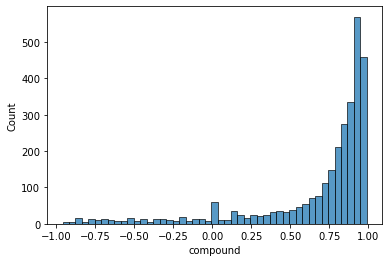

In [22]:
#looking at the distribution of compound scores
sns.histplot(unique_30_text['compound'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

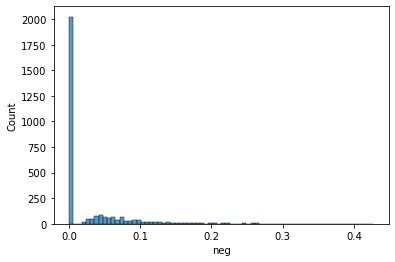

In [23]:
#looking at the distribution of negative score
sns.histplot(unique_30_text['neg'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

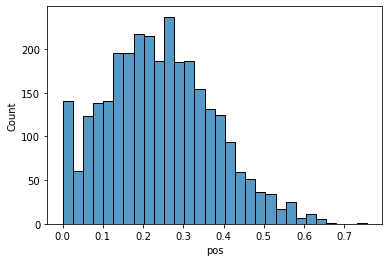

In [24]:
#looking at the distribution of positive scores
sns.histplot(unique_30_text['pos'])

In [25]:
#lets look at how many negative reviews we have for each hotel

(unique_30_text['compound']<=0).groupby(unique_30_text['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Baan Mai                                                          7
Baan Rim Pa Kalim                                                 4
Bellini                                                          14
Bianconero da Tuveri Restaurant & Pizzeria                        6
Blue Manao                                                       10
Bush Garden Kamala<U+200B>                                        5
Cafe del Mar Phuket                                              20
Danny's Place Kamala                                             12
Grill Bill                                                        5
H.C. Andersen - Family Restaurant                                16
HQ Beach Lounge                                                  12
Heaven                                                            3
Hey Ha Bar & Restaurant                                           6
Kaab Gluay                                                       15
Mamma Mia Grill & Restaura

In [26]:
#calculate percentage of total reviews

percent_negative = pd.DataFrame((unique_30_text['compound']<=0).groupby(unique_30_text['Hotel/Restaurant name']).sum()/unique_30_text['Hotel/Restaurant name'].groupby(unique_30_text['Hotel/Restaurant name']).count()*100, columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative

,% negative reviews
Hotel/Restaurant name,
Sweet Dream Restaurant,2.000000
Heaven,3.157895
Baan Rim Pa Kalim,4.000000
"Vanilla Sky Bar & Gastro Pub - Cape Sienna - Phuket, Thailand",4.040404
Grill Bill,5.000000
Bush Garden Kamala<U+200B>,5.050505
Bianconero da Tuveri Restaurant & Pizzeria,6.122449
Hey Ha Bar & Restaurant,6.315789
Baan Mai,7.000000


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

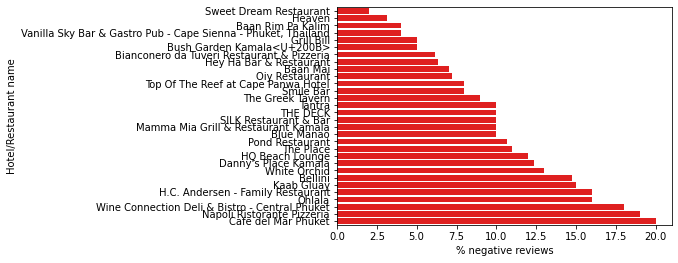

In [27]:
#ploting the negative reviews using seaborn
sns.barplot(data=percent_negative, x='% negative reviews', y= percent_negative.index, color='r')

In [28]:
#processing the extracted text using the already defined function
unique_30_text['Processed_Review'] = unique_30_text['Review'].apply(preprocess_text)
hotel_positive_subset = unique_30_text.loc[(unique_30_text['Hotel/Restaurant name']=="Cafe del Mar Phuket") & (unique_30_text['compound']>0),:]
hotel_negative_subset = unique_30_text.loc[(unique_30_text['Hotel/Restaurant name']=="Cafe del Mar Phuket") & (unique_30_text['compound']<=0),:]
hotel_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,Processed_Review
42248,rn580806693,Reviewed 3 days ago,Kamala,Cafe del Mar Phuket,This is one of my favorite chill place to drin...,0.9382,0.0,0.710,0.290,"[one, favorit, chill, place, drink, meet, frie..."
42249,rn580290668,Reviewed 6 days ago,Kamala,Cafe del Mar Phuket,"The location is good, Service was so so, we or...",0.7096,0.0,0.781,0.219,"[locat, good, servic, order, cocktail, beer, s..."
42251,rn579220504,Reviewed 1 week ago,Kamala,Cafe del Mar Phuket,If you want good sushi I recommend you not to ...,0.9042,0.0,0.747,0.253,"[want, good, sushi, recommend, come, much, bet..."
42252,rn579135531,Reviewed 1 week ago,Kamala,Cafe del Mar Phuket,Perfect beach club by the beach with amazing s...,0.9817,0.0,0.547,0.453,"[perfect, beach, club, beach, amaz, sun, set, ..."
42253,rn578975065,Reviewed 1 week ago,Kamala,Cafe del Mar Phuket,"From the people around us, we gathered that ce...",0.6369,0.0,0.866,0.134,"[peopl, around, us, gather, certain, group, pe..."


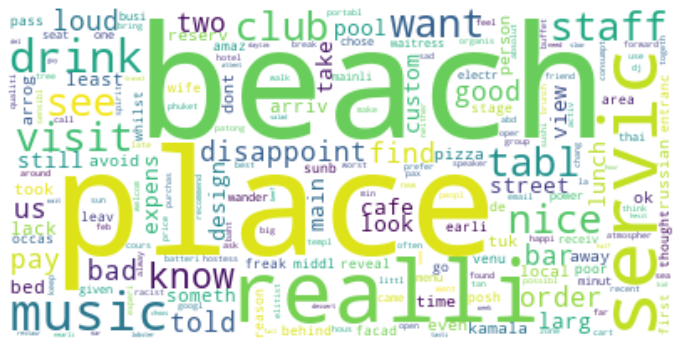

In [29]:
#wordcloud of words from negative reviews by product

neg_tokens = [word for review in hotel_negative_subset['Processed_Review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

#Display the generated image
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

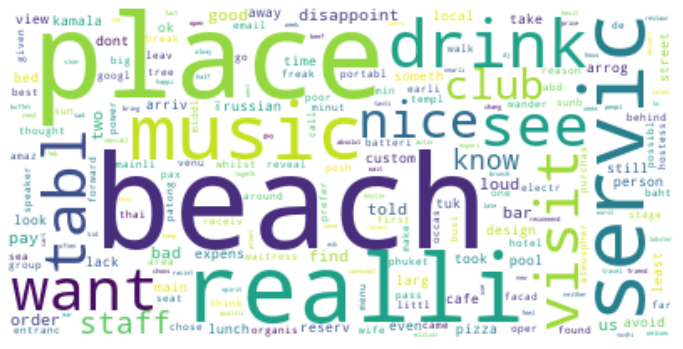

In [30]:
#wordcloud of words from positive reviews by product
pos_tokens = [word for review in hotel_positive_subset['Processed_Review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [31]:
#checking frequency distribution of positive tokens

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

 place  beach  great   good   food  music servic   nice   time   pool 
    49     41     32     31     31     24     23     17     17     17 


In [32]:
#checking frequency distribution of negative tokens

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

 beach  place realli servic  music  drink    see   want    get  visit 
    11     10      8      7      7      5      4      4      4      4 


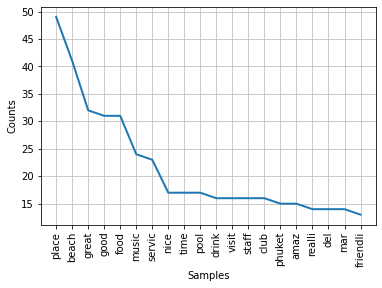

In [33]:
#plotting the frequency distribution of positive tokens
pos_freqdist.plot(20);

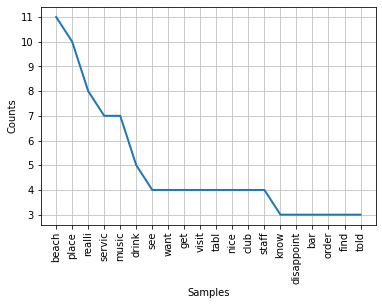

In [34]:
#plotting the frequency distribution of negative tokens
neg_freqdist.plot(20);